In [ ]:
!pip install numpy

In [1]:
# importar bibliotecas
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#cargar los datos
wine = load_wine()

In [3]:
import pandas as pd

In [4]:
#convertir a dataframe
data = pd.DataFrame(data= np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['target'])

In [5]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [7]:
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#Definicion de modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

Logistic Regression trained.
Logistic Regression predicted.
Accuracy:  1.0
Recall:  1.0
Precision:  1.0
F1:  1.0
Cross validation:  0.961111111111111


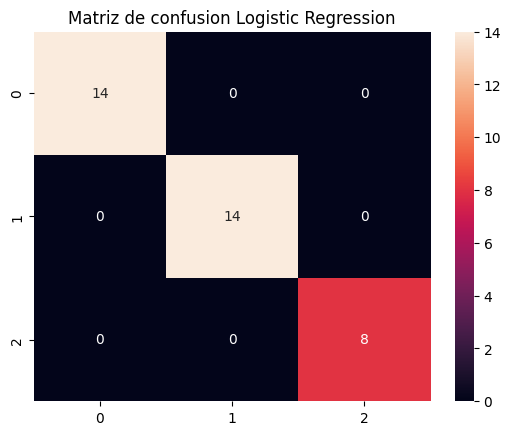

SVC trained.
SVC predicted.
Accuracy:  0.8055555555555556
Recall:  0.7619047619047619
Precision:  0.7682539682539682
F1:  0.7639846743295019
Cross validation:  0.6634920634920635


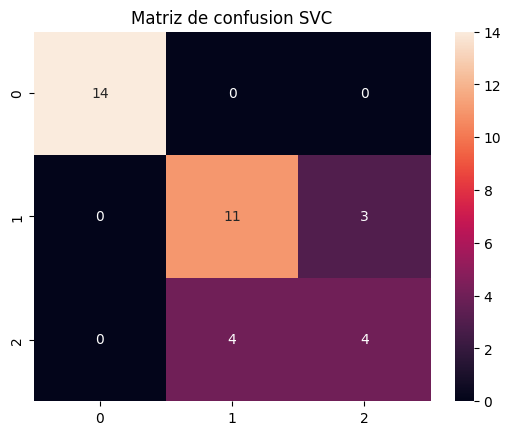

Decision Tree trained.
Decision Tree predicted.
Accuracy:  0.9444444444444444
Recall:  0.9345238095238096
Precision:  0.953968253968254
F1:  0.9424740010946907
Cross validation:  0.8931746031746031


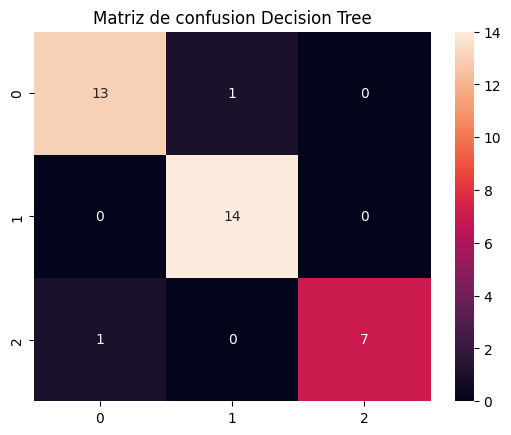

In [9]:
# evalucion de los modelos
for name, model in models.items():
    # Entrenamiento
    model.fit(X_train, y_train)
    print(name + ' trained.')

    # Prediccion
    y_pred = model.predict(X_test)
    print(name + ' predicted.')

    # Evaluacion
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Recall: ', recall_score(y_test, y_pred, average='macro'))
    print('Precision: ', precision_score(y_test, y_pred, average='macro'))
    print('F1: ', f1_score(y_test, y_pred, average='macro'))

    # cross validation
    scores = cross_val_score(model, X, y, cv=5)
    print('Cross validation: ', scores.mean())

    # Matriz de confusion
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.title(f"Matriz de confusion {name}")
    plt.show()
